# DataSet class and plotting tools

In [1]:
from numpy import genfromtxt
from ROOT import TFile
from plotting_tools.DataSet import DataSet
from plotting_tools.CutsYieldPrinter import CutsYieldPrinter
from plotting_tools.DistributionPlotter import DistributionPlotter
from ttbar_analysis.plot_script.GetTreeAndEfficiency import *
from ttbar_analysis.plot_script.ttbarDataDictionaries import *

Welcome to ROOTaaS 6.06/00


In [7]:
help(DataSet)

Help on class DataSet in module plotting_tools.DataSet:

class DataSet(__builtin__.object)
 |  Store data sample with methods to obtain the rescaled number of events,
 |  and the fraction that passes a given cut.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tree, name, legend_name, cross_section, luminosity, generator=None, efficiency=None)
 |  
 |  cut_efficiency(self, cut)
 |      Fraction of events passing a given cut
 |  
 |  n_expected(self, cut='')
 |  
 |  n_expected_with_eff(self, cut='')
 |  
 |  n_generated(self, cut='')
 |  
 |  n_generated_with_eff(self, cut='')
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [2]:
detector = "ILD"
luminosity = 1000.

# name, legend-name, cross section, generator
data_set_names = [
                  "hz",
                  "zz",
                  "tt_dilep",
                  "tt_allhad",
                  "ww",
                  "tt_semilep",
                 ]


In [3]:
cd ~/GitHub/Top-Mass-Measurement-FCC-ee/ttbar_analysis

/home/Nick/GitHub/Top-Mass-Measurement-FCC-ee/ttbar_analysis


In [4]:
root_files = []
trees = []
efficiencies = []
data_sets = []

for data_set_name in data_set_names:
    aux_file, aux_tree = get_tree(data_set_name)
    aux_efficiency = get_efficiency(data_set_name)
    root_files.append(aux_file)
    trees.append(aux_tree)
    efficiencies.append(aux_efficiency)
    new_data_set = DataSet(aux_tree,
                       data_set_name,
                       legend_names[data_set_name],
                       cross_sections[data_set_name],
                       luminosity,
                       generators[data_set_name], 
                       aux_efficiency)
    data_sets.append( new_data_set )

## DataSet, store relevant information about a sample, with methods to get the yield of a cut and the expected number of events

In [5]:
print data_sets[0]
sample = data_sets[0]

In [6]:
cut = ""
print sample.efficiency
print sample.n_entries
print sample.cut_efficiency(cut)
print sample.n_generated_with_eff(cut)
print sample.n_generated(cut)
print sample.n_expected_with_eff(cut)
print sample.n_expected(cut)

0.144
6858
1.0
6858
47625
18720
130000


In [8]:
cut = "lep1_e > 30"
print sample.efficiency
print sample.n_entries
print sample.cut_efficiency(cut)
print sample.n_generated_with_eff(cut)
print sample.n_generated(cut)
print sample.n_expected_with_eff(cut)
print sample.n_expected(cut)

0.144
6858
0.461213181686
3163
21965
8633
59957


In [9]:
cuts = []
cuts.append("four_jets_mass > 150")
cuts.append("four_jets_mass < 270")
cuts.append("min_jets_mass > 10")
cuts.append("min_jets_mass < 90")
cuts.append("second_min_jets_mass > 20")
cuts.append("second_min_jets_mass < 100")
cuts.append("lep1_e < 100")
cuts.append("missing_rec_e > 20")
cuts.append("missing_rec_e < 150")
cuts.append("n_rec_charged >= 20")
cuts.append("n_rec_charged >= 10")
cuts.append("chi2_top_constrainer <= 40")
cuts.append("success == 1")

## CutsYieldPrinter class: 
- base class to print tables and LaTeX tables with the yields of the cuts
- can be constructed with a list of datasets and a list of cuts

In [10]:
aux_caption = "Selection cuts yields"
ttbar_yields_printer = CutsYieldPrinter(data_sets, cuts, aux_caption)

In [11]:
ttbar_yields_printer.PrintTable()

Dataset	hz	zz	tt_dilep	tt_allhad	ww	tt_semilep
Generator	Pythia8	Pythia8	Pythia8	Pythia8	Pythia8	Madgraph
Generated events	47625	47889	49306	4800	28511	9687
four_jets_mass > 150	4756	1555	2427	372	424	6277
four_jets_mass < 270	3044	892	2427	26	320	6269
min_jets_mass > 10	2914	737	1905	26	235	6268
min_jets_mass < 90	2914	737	1905	25	235	6267
second_min_jets_mass > 20	2871	702	1635	25	202	6266
second_min_jets_mass < 100	2866	702	1635	23	202	6262
lep1_e < 100	2756	630	1635	23	170	6260
missing_rec_e > 20	2694	573	1635	23	170	6260
missing_rec_e < 150	2667	557	1571	23	168	6253
n_rec_charged >= 20	2418	427	1383	23	100	6245
n_rec_charged >= 10	2418	427	1383	23	100	6245
chi2_top_constrainer <= 40	2259	375	1374	20	96	6238
success == 1	1332	186	521	14	51	5325






In [12]:
ttbar_yields_printer.PrintLatex()

\begin{table}

\begin{tabular}{c|c|c|c|c|c|c}

Dataset & hz & zz & tt_dilep & tt_allhad & ww & tt_semilep\\
Generator & Pythia8 & Pythia8 & Pythia8 & Pythia8 & Pythia8 & Madgraph\\
Generated events & 47625 & 47889 & 49306 & 4800 & 28511 & 9687\\
four_jets_mass > 150 & 4756 & 1555 & 2427 & 372 & 424 & 6277\\
four_jets_mass < 270 & 3044 & 892 & 2427 & 26 & 320 & 6269\\
min_jets_mass > 10 & 2914 & 737 & 1905 & 26 & 235 & 6268\\
min_jets_mass < 90 & 2914 & 737 & 1905 & 25 & 235 & 6267\\
second_min_jets_mass > 20 & 2871 & 702 & 1635 & 25 & 202 & 6266\\
second_min_jets_mass < 100 & 2866 & 702 & 1635 & 23 & 202 & 6262\\
lep1_e < 100 & 2756 & 630 & 1635 & 23 & 170 & 6260\\
missing_rec_e > 20 & 2694 & 573 & 1635 & 23 & 170 & 6260\\
missing_rec_e < 150 & 2667 & 557 & 1571 & 23 & 168 & 6253\\
n_rec_charged >= 20 & 2418 & 427 & 1383 & 23 & 100 & 6245\\
n_rec_charged >= 10 & 2418 & 427 & 1383 & 23 & 100 & 6245\\
chi2_top_constrainer <= 40 & 2259 & 375 & 1374 & 20 & 96 & 6238\\
success == 1 & 1332 &

## DistributionPlotter Class:
- base plotting class with plenty of options to plot variables:
- can be constructed with a list of datasets 

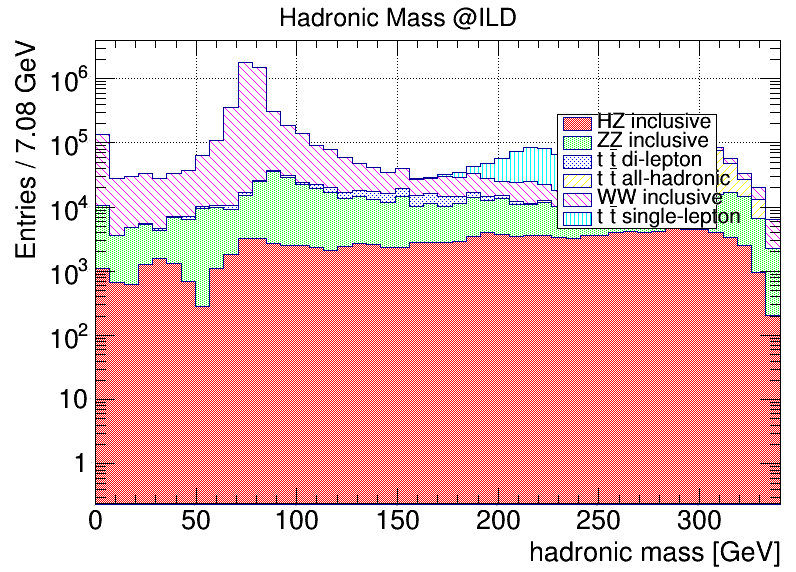

In [13]:
four_jets_mass = DistributionPlotter("four_jets_mass",
                                     "",
                                     "four_jets_mass_{}".format(detector),
                                     48, 0, 340,
                                     "Hadronic Mass @{}".format(detector),
                                     "hadronic mass [GeV]", "GeV",
                                     norm=False,
                                     logy = True,
                                     stack = True,
                                     set_title = True)
four_jets_mass.add_dataset_list(data_sets)
four_jets_mass.canvas.Draw()

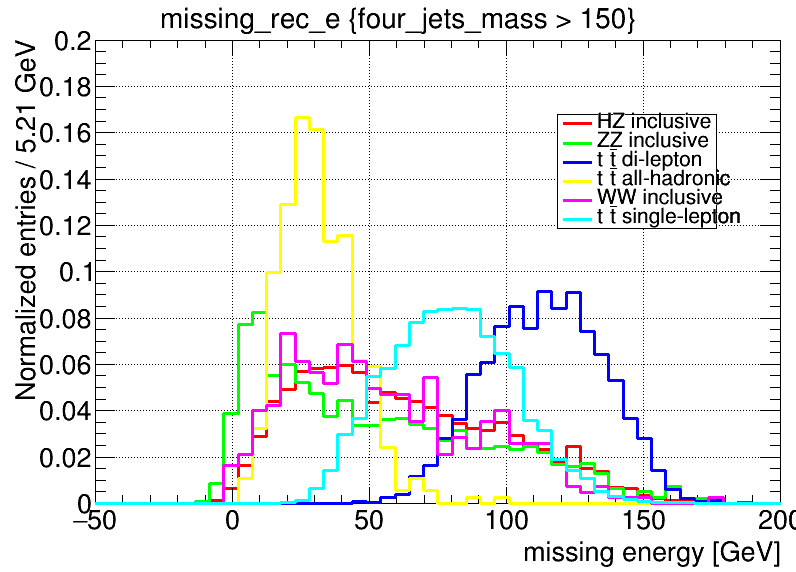

In [14]:
missing_e_rec = DistributionPlotter("missing_rec_e",
                                     "four_jets_mass > 150",
                                     "missing_rec_e{}".format(detector),
                                     48, -50, 200,
                                     "Missing Energy @{}".format(detector),
                                     "missing energy [GeV]", "GeV",
                                     norm = True,
                                     logy = False,
                                     stack = False,
                                     set_title = False)
missing_e_rec.add_dataset_list(data_sets)
missing_e_rec.canvas.Draw()